In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
train = pd.read_csv('train_age_dataset.csv')
test = pd.read_csv('test_age_dataset.csv')
train.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [4]:
train.shape

(488877, 27)

In [5]:
X=train

In [6]:
num_cols = [col for col in X.columns if X[col].nunique()>5]

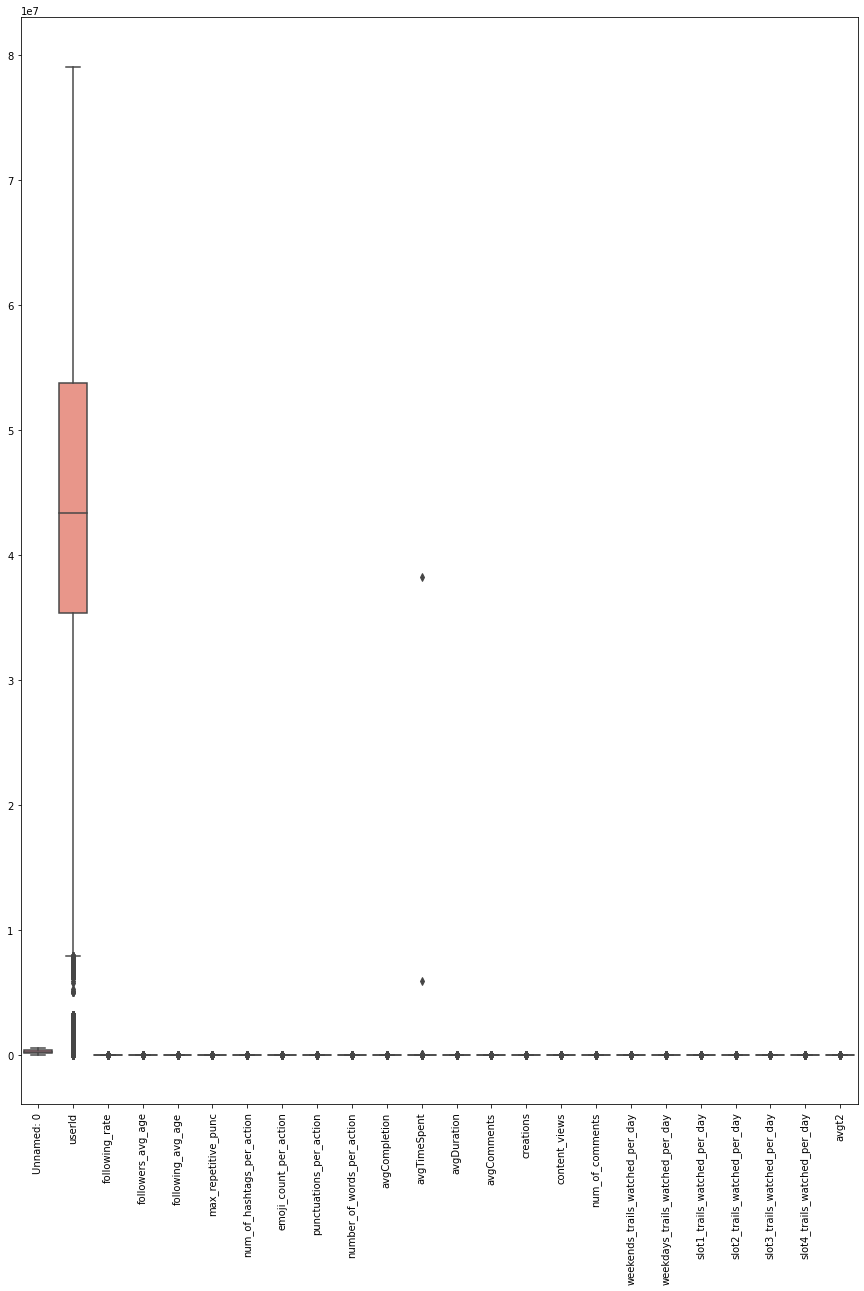

In [7]:
# using boxplot to check for outliers and skewedness
plt.figure(figsize=(15,20))
ax = sns.boxplot(data=X[num_cols])
plt.xticks(rotation=90)
plt.show()

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'following_rate'}>,
        <AxesSubplot:title={'center':'followers_avg_age'}>,
        <AxesSubplot:title={'center':'following_avg_age'}>],
       [<AxesSubplot:title={'center':'max_repetitive_punc'}>,
        <AxesSubplot:title={'center':'num_of_hashtags_per_action'}>,
        <AxesSubplot:title={'center':'emoji_count_per_action'}>,
        <AxesSubplot:title={'center':'punctuations_per_action'}>,
        <AxesSubplot:title={'center':'number_of_words_per_action'}>],
       [<AxesSubplot:title={'center':'avgCompletion'}>,
        <AxesSubplot:title={'center':'avgTimeSpent'}>,
        <AxesSubplot:title={'center':'avgDuration'}>,
        <AxesSubplot:title={'center':'avgComments'}>,
        <AxesSubplot:title={'center':'creations'}>],
       [<AxesSubplot:title={'center':'content_views'}>,
        <AxesSubplot:title={'center':'num_of_comments'}>,
  

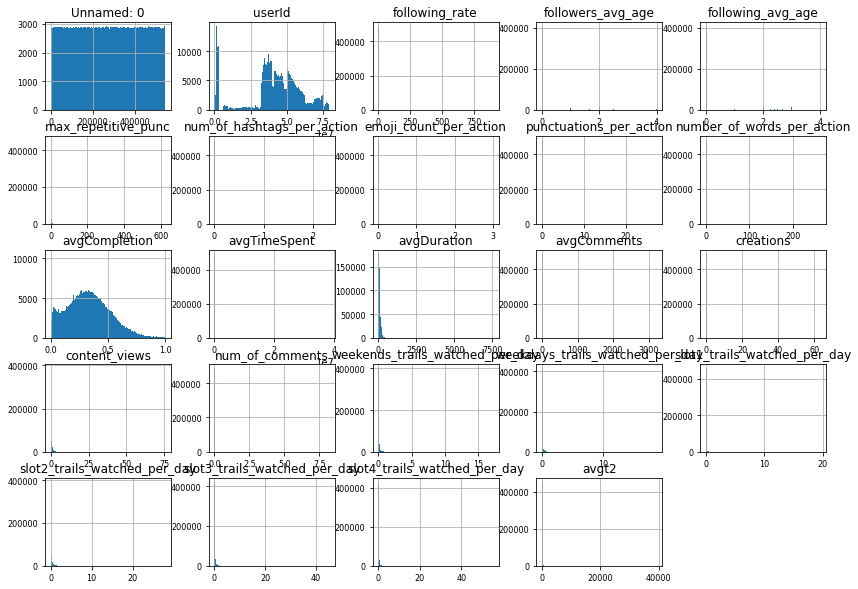

In [8]:
X[num_cols].hist(figsize=(14,10),xlabelsize=8, ylabelsize=8,bins=170)

In [ ]:
for col in num_cols:
    fig,ax = plt.subplots(1,3)
    sns.distplot(X[col],ax=ax[0])
    sns.distplot(np.sqrt(X[col]-X[col].min()+1),ax=ax[1])
    sns.distplot(X[col]-X[col].min()+1).transform(np.log),ax=ax[2])

In [9]:
train.drop(['Unnamed: 0','userId'],axis=1).describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,...,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,...,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,...,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,...,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,...,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [10]:
train.nunique()

Unnamed: 0                         488877
userId                             488877
tier                                    3
gender                                  2
following_rate                      15453
followers_avg_age                    3495
following_avg_age                    3949
max_repetitive_punc                    95
num_of_hashtags_per_action            420
emoji_count_per_action                742
punctuations_per_action              3129
number_of_words_per_action          16664
avgCompletion                      458839
avgTimeSpent                        98838
avgDuration                        415696
avgComments                           186
creations                            9972
content_views                       32292
num_of_comments                      3881
weekends_trails_watched_per_day     20340
weekdays_trails_watched_per_day     31432
slot1_trails_watched_per_day        11765
slot2_trails_watched_per_day        20220
slot3_trails_watched_per_day      

In [11]:
max_threshold=train.avgTimeSpent.quantile(0.999)
min_threshold=train.avgTimeSpent.quantile(0.001)
print(min_threshold,max_threshold)

1.0 1127.7528305402795


In [12]:
train[train.avgTimeSpent>max_threshold]

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
3430,360998,70780891,2,2,0.000000,0.0,0.000000,0,0.0,0.0,...,0.107143,0.0,0.026786,0.010714,0.0,0.000000,0.089286,0.017857,0.000000,1
6567,237098,42302751,2,1,0.000000,0.0,0.000000,0,0.0,0.0,...,0.097561,0.0,0.000000,0.019512,0.0,0.081301,0.000000,0.016260,0.000000,1
7632,90655,2411472,2,1,0.005906,0.0,0.000000,0,0.0,0.0,...,0.025591,0.0,0.000000,0.010630,0.0,0.000000,0.045276,0.007874,191.071429,1
8072,126380,37543286,2,1,0.000000,0.0,0.000000,0,0.0,0.0,...,0.056000,0.0,0.024000,0.001600,0.0,0.008000,0.040000,0.008000,170.000000,4
9993,352172,68511479,2,1,0.000000,0.0,0.000000,0,0.0,0.0,...,0.161290,0.0,0.072581,0.003226,0.0,0.080645,0.032258,0.048387,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482259,31866,45887836,1,1,0.000000,0.0,0.000000,2,0.0,0.0,...,0.147541,0.0,0.012295,0.029508,0.0,0.000000,0.040984,0.131148,169.666667,3
482313,428223,71931471,2,2,0.000000,0.0,0.000000,0,0.0,0.0,...,0.078431,0.0,0.000000,0.078431,0.0,0.352941,0.039216,0.000000,154.000000,4
483436,296361,55570615,2,1,0.000000,0.0,0.000000,0,0.0,0.0,...,0.045455,0.0,0.009091,0.005455,0.0,0.018182,0.009091,0.018182,0.000000,1
485760,239576,42852502,2,1,0.000000,0.0,0.000000,0,0.0,0.0,...,0.032520,0.0,0.000000,0.006504,0.0,0.000000,0.032520,0.000000,0.000000,1


In [13]:
train[train.avgTimeSpent<min_threshold]

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group


In [14]:
train1=train[(train.avgTimeSpent<max_threshold)]
train1.shape

(488388, 27)

In [15]:
min_threshold2,max_threshold2=train.avgt2.quantile([0.001,0.999])
min_threshold2,max_threshold2

(0.0, 17306.76794472008)

In [16]:
train[train.avgt2>max_threshold2]

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
3912,162104,568675,3,1,0.004127,3.0,3.0,0,0.0,0.0,...,0.220083,0.001376,0.004127,0.058322,0.000000,0.008253,0.291609,0.000000,20476.44444,4
5673,166895,434059,3,1,0.002415,0.0,0.0,0,0.0,0.0,...,0.067633,0.000000,0.013889,0.011836,0.016908,0.021739,0.016908,0.031401,23947.75000,4
5700,30356,248129,1,1,0.003205,0.0,0.0,0,0.0,0.0,...,0.011752,0.000000,0.001068,0.000641,0.002137,0.000000,0.002137,0.001068,28478.66667,4
5850,432020,444656,2,1,0.004884,0.0,0.0,0,0.0,0.0,...,0.028083,0.002442,0.006105,0.002442,0.006105,0.008547,0.007326,0.002442,19914.80000,2
6378,490666,677409,2,1,0.002861,4.0,3.0,0,0.0,0.0,...,0.004292,0.000000,0.000000,0.000858,0.000000,0.000000,0.004292,0.000000,18642.66667,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481599,164034,1627169,3,1,0.001776,0.0,0.0,0,0.0,0.0,...,0.014210,0.000000,0.000000,0.002842,0.000000,0.014210,0.000000,0.000000,36433.00000,1
485292,465823,667911,2,1,0.001425,0.0,0.0,0,0.0,0.0,...,0.005698,0.000000,0.000712,0.000855,0.000000,0.000000,0.005698,0.000000,20069.71429,4
487128,465821,666004,2,1,0.025641,0.0,0.0,0,0.0,0.0,...,0.019943,0.000000,0.000000,0.005983,0.011396,0.009972,0.000000,0.008547,21167.28571,4
487605,454572,304110,2,1,0.011013,0.0,0.0,0,0.0,0.0,...,0.005507,0.000000,0.002753,0.000000,0.000000,0.004405,0.000000,0.001101,21979.75000,2


In [17]:
train[train.avgt2<min_threshold2]

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group


In [18]:
train2=train1[(train1.avgt2<max_threshold2)]
train2.shape

(487904, 27)

In [19]:
min_threshold3,max_threshold3=train.following_rate.quantile([0.001,0.999])
min_threshold3,max_threshold3

(0.0, 9.185326629360251)

In [20]:
train[train.following_rate>max_threshold3]

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
16,16863,32554791,1,1,19.640625,1.921013,1.981818,5,0.0,0.000000,...,2.335938,0.007812,0.296875,0.521875,0.015625,0.929688,1.085938,1.171875,119.328358,3
576,35463,49483564,1,1,106.741667,2.182099,2.134377,0,0.0,0.000000,...,1.916667,0.016667,0.687500,0.535000,0.225000,1.083333,0.991667,1.750000,75.824464,4
1419,508102,39810026,2,2,14.161290,2.037838,2.046584,5,0.0,0.000000,...,0.991935,0.008065,0.588710,0.138710,0.000000,0.750000,0.500000,0.620968,151.163009,2
2089,105452,38187200,2,1,18.376000,2.139896,2.142629,6,0.0,0.000000,...,0.344000,0.008000,0.192000,0.092800,0.256000,0.024000,0.456000,0.112000,133.204852,2
2185,45280,33701418,1,1,23.755906,1.964344,2.109988,4,0.0,0.000000,...,3.519685,0.181102,0.574803,1.155906,0.031496,1.889764,2.826772,2.181102,138.453280,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486601,508005,34467156,2,1,111.181102,1.958876,2.326954,2,0.0,0.000000,...,3.055118,0.039370,1.185039,0.984252,1.086614,1.708661,1.614173,2.881890,124.526551,3
486953,51807,12630810,1,1,28.072874,2.051962,2.657407,3,0.0,0.000000,...,0.668016,0.080972,0.329960,0.252632,0.663968,0.206478,0.327935,0.724696,175.137572,4
487228,121862,51562639,2,1,90.627119,2.070149,2.377087,26,0.0,0.006173,...,1.932203,0.042373,1.059322,0.737288,0.279661,2.737288,2.177966,0.610169,170.155521,2
487333,38817,36917065,1,2,16.808000,2.102941,2.277946,4,0.0,0.000000,...,1.848000,0.064000,0.740000,0.504000,1.960000,0.456000,0.272000,1.312000,170.067847,3


In [21]:
train3=train2[(train2.following_rate<max_threshold3)]
train3.shape

(487415, 27)

In [22]:
min_threshold4,max_threshold4=train.max_repetitive_punc.quantile([0.001,0.999])
min_threshold4,max_threshold4

(0.0, 36.0)

In [23]:
train[train.max_repetitive_punc>max_threshold4]

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
586,400987,32866348,2,1,0.007874,3.000000,3.000000,47,0.000000,0.0,...,0.118110,0.023622,0.149606,0.011024,0.062992,0.015748,0.039370,0.236220,138.000000,3
800,537924,37286724,2,1,0.456000,1.562500,2.404762,37,0.000000,0.0,...,0.096000,0.000000,0.036000,0.011200,0.000000,0.088000,0.040000,0.000000,137.800000,1
930,445132,44949026,2,1,0.000000,0.000000,0.000000,47,0.000000,0.0,...,0.147541,0.000000,0.000000,0.040984,0.000000,0.049180,0.155738,0.000000,154.600000,4
6098,415042,1308784,2,1,0.018364,2.250000,2.500000,72,0.000000,0.0,...,0.023372,0.001669,0.000000,0.006678,0.000000,0.001669,0.003339,0.028381,226.400000,4
6797,464990,54213285,2,1,0.000000,0.000000,0.000000,40,0.000000,0.0,...,0.052632,0.000000,0.013158,0.007018,0.000000,0.000000,0.061404,0.000000,175.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482286,153464,2353713,3,1,0.003891,0.000000,0.000000,40,0.000000,0.0,...,0.036965,0.000000,0.000000,0.016342,0.000000,0.029183,0.048638,0.003891,188.266667,1
483600,43160,33653713,1,1,0.023622,1.727273,4.000000,45,0.000000,0.0,...,0.464567,0.000000,0.350394,0.211024,0.000000,0.440945,0.850394,0.464567,136.010811,4
485318,114794,42599444,2,2,0.000000,0.000000,0.000000,46,0.238095,0.0,...,0.146341,0.000000,0.000000,0.043902,0.097561,0.032520,0.065041,0.024390,140.400000,1
485331,119936,39552379,2,1,1.346774,2.187500,2.042553,44,0.000000,0.0,...,1.709677,0.072581,0.592742,0.475806,0.395161,1.725806,0.717742,0.725806,220.414729,2


In [24]:
train4=train3[(train3.max_repetitive_punc<max_threshold4)]
train4.shape

(486927, 27)

In [25]:
y = train4['age_group']
X=train4.drop(['age_group'], axis =1)

In [26]:
sqrt_col=['avgComments',
 'creations',
 'content_views',
 'num_of_comments',
 'weekends_trails_watched_per_day',
 'weekdays_trails_watched_per_day','following_rate','avgComments','slot2_trails_watched_per_day','slot1_trails_watched_per_day', 'avgt2','slot4_trails_watched_per_day','slot3_trails_watched_per_day','followers_avg_age','following_avg_age','max_repetitive_punc','num_of_hashtags_per_action','avgCompletion','emoji_count_per_action','punctuations_per_action','number_of_words_per_action','avgTimeSpent']
log_col=['avgDuration']

In [27]:
for col in sqrt_col:
    X[col] = np.sqrt(X[col])
    test[col]=np.sqrt(test[col])

for col in log_col:
    X[col]=(X[col]-X[col].min()+1).transform(np.log)
    test[col]=(test[col]-test[col].min()+1).transform(np.log)

In [28]:
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X,y)

KNeighborsClassifier(n_neighbors=11)

In [29]:
rfc=RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=7,min_samples_leaf=3)
rfc.fit(X,y)

RandomForestClassifier(min_samples_leaf=3, n_estimators=500, n_jobs=-1,
                       random_state=7)

In [30]:
y_test_pred1= rfc.predict_proba(test)
y_test_pred2=neigh.predict_proba(test)
#weighted average
y_test_pred=(y_test_pred1*0.73+y_test_pred2*0.3)

y_test_pred=np.argmax(y_test_pred,axis=1)+1
y_test_pred

array([1, 1, 1, ..., 4, 1, 1], dtype=int64)

In [31]:
y_test_pred.shape

(54320,)

In [ ]:
print(cross_val_score(rfc, X, y, cv=9,scoring='f1_micro').mean())
print(cross_val_score(neigh, X, y, cv=9,scoring='f1_micro').mean())

In [32]:
output = pd.DataFrame({'prediction': y_test_pred})
output.to_csv('submission_final.csv',index=False)

In [33]:
output['prediction'].value_counts()  

1    35149
2     8372
3     7831
4     2968
Name: prediction, dtype: int64